In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("pence_tweets_ner.csv")

Explore data

In [3]:
data.head()

,id,created_at,tweet_text,Entity,Label,Start,End
0,631527288991944704,2015-08-12 18:06:53,Farmers in a total of 88 counties can request ...,88,CARDINAL,22,24
1,631527288991944704,2015-08-12 18:06:53,Farmers in a total of 88 counties can request ...,FSA,ORG,82,85
2,715567254969122816,2016-03-31 15:51:42,These new jobs are above the state's avg wage....,@HoistLiftruck manufacturing &amp,ORG,75,108
3,715567254969122816,2016-03-31 15:51:42,These new jobs are above the state's avg wage....,AStateThatWorks,PERSON,126,141
4,711985273622507520,2016-03-21 18:38:11,RT @FirstLadyIN: Sweet Jaida introducing me to...,Sweet Jaida,PERSON,17,28


In [4]:
data["datetime"] = pd.to_datetime(data["created_at"])
import datetime as dt
data["dates"] = data.datetime.dt.date
data["time"] = data.datetime.dt.time

In [5]:
data.head()

,id,created_at,tweet_text,Entity,Label,Start,End,datetime,dates,time
0,631527288991944704,2015-08-12 18:06:53,Farmers in a total of 88 counties can request ...,88,CARDINAL,22,24,2015-08-12 18:06:53,2015-08-12,18:06:53
1,631527288991944704,2015-08-12 18:06:53,Farmers in a total of 88 counties can request ...,FSA,ORG,82,85,2015-08-12 18:06:53,2015-08-12,18:06:53
2,715567254969122816,2016-03-31 15:51:42,These new jobs are above the state's avg wage....,@HoistLiftruck manufacturing &amp,ORG,75,108,2016-03-31 15:51:42,2016-03-31,15:51:42
3,715567254969122816,2016-03-31 15:51:42,These new jobs are above the state's avg wage....,AStateThatWorks,PERSON,126,141,2016-03-31 15:51:42,2016-03-31,15:51:42
4,711985273622507520,2016-03-21 18:38:11,RT @FirstLadyIN: Sweet Jaida introducing me to...,Sweet Jaida,PERSON,17,28,2016-03-21 18:38:11,2016-03-21,18:38:11


Visualize the tweets over time

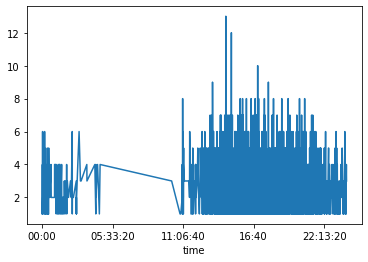

In [6]:
data.time.value_counts().plot()


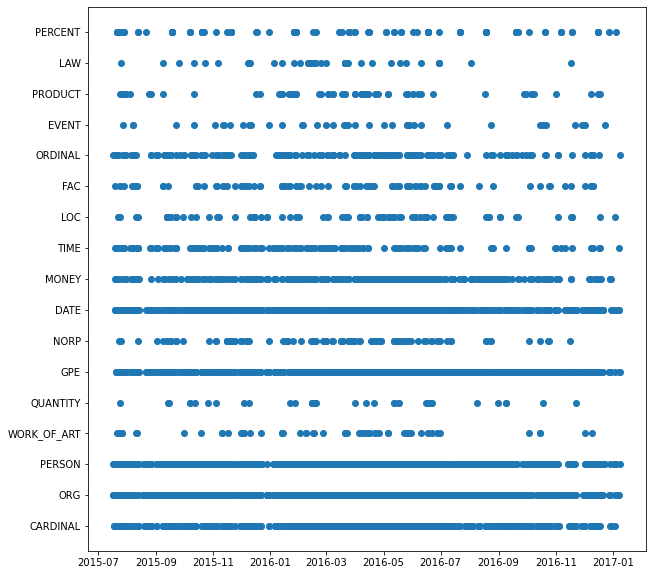

In [8]:
plt.figure(figsize=(10,10))
plt.scatter(x=data.dates, y= data.Label)


Visualize how often his tweets invovles different semantic entities

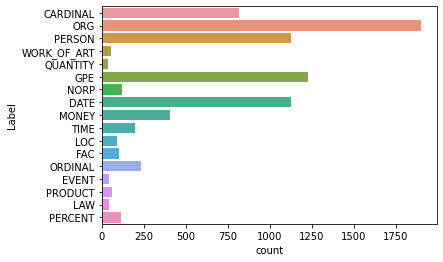

In [9]:
sns.countplot(y="Label",data=data)

In [11]:
temp = data.groupby("Label").Entity.value_counts()

In [12]:
cardinal = temp.where(temp["CARDINAL"]==temp["CARDINAL"].max())
cardinal.dropna()

Label     Entity
CARDINAL  2         35.0
MONEY     2          4.0
Name: Entity, dtype: float64

In [13]:
person = temp.where(temp["PERSON"]==temp["PERSON"].max())
person.dropna()

Label    Entity 
NORP     Hoosier    19.0
ORG      Hoosier     5.0
PERSON   Hoosier    80.0
PRODUCT  Hoosier    11.0
Name: Entity, dtype: float64

In [14]:
org = temp.where(temp["ORG"]==temp["ORG"].max())
org.dropna()

Label  Entity   
ORG    RT @INDOT    72.0
Name: Entity, dtype: float64

In [15]:
NORP = temp.where(temp["NORP"]==temp["NORP"].max())
NORP.dropna()

Label  Entity
NORP   Syrian    22.0
Name: Entity, dtype: float64

In [16]:
GPE = temp.where(temp["GPE"]==temp["GPE"].max())
GPE.dropna()

Label   Entity 
GPE     Indiana    618.0
MONEY   Indiana      1.0
PERSON  Indiana      4.0
Name: Entity, dtype: float64

In [17]:
money = temp.where(temp["MONEY"]==temp["MONEY"].max())
money.dropna()

Label   Entity       
MONEY   $1 billion       7.0
        RoadsMeanJobs    7.0
PERSON  RoadsMeanJobs    8.0
Name: Entity, dtype: float64

Most frequently tweeted about Entities

In [20]:
data.Entity.value_counts().sort_values().tail(30)

NEWS                20
4th                 21
Syrian              22
1                   22
1st                 23
one                 23
Congrats            24
annual              25
House               25
U.S.                27
2015                28
Indianapolis        29
ICYMI               32
US                  32
Statehouse          35
tonight             35
AStateThatWorks     36
2                   39
Japan               42
this afternoon      42
this morning        42
2016                52
Indy                56
first               57
Hoosiers            61
RT @INDOT           72
Today              104
Hoosier            115
today              194
Indiana            623
Name: Entity, dtype: int64